In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# For using R within python
%load_ext rpy2.ipython

In [7]:
%cp /content/drive/MyDrive/Colab/R/Library/library.tar.gz .
!tar xf library.tar.gz

tar: Removing leading `/' from member names


In [8]:
%%R
.libPaths("usr/local/lib/R/site-library/")

In [26]:
%%capture
%%R
library(readr)
library(psych)
library(dplyr)
library(nFactors)
library(ggplot2)
library(rms)
library(nFactors)
library(reshape2)
library(GPArotation)
library(corrplot)
#library(sem) current not working

In [20]:
%%R
data <- read.csv('/content/drive/MyDrive/Colab/Modeling/Factor Analysis/places.csv')

In [22]:
%%R
print(dim(data))
print(colnames(data))
head(data)

[1] 329  10
 [1] "Climate_and_Terrain"         "Housing"                    
 [3] "Health_Care_and_Environment" "Crime"                      
 [5] "Transportation"              "Education"                  
 [7] "The_Arts"                    "Recreation"                 
 [9] "Economics"                   "Place"                      
  Climate_and_Terrain Housing Health_Care_and_Environment Crime Transportation
1                 521    6200                         237   923           4031
2                 575    8138                        1656   886           4883
3                 468    7339                         618   970           2531
4                 476    7908                        1431   610           6883
5                 659    8393                        1853  1483           6558
6                 520    5819                         640   727           2444
  Education The_Arts Recreation Economics                      Place
1      2757      996       1405      7633

In [23]:
%%R
data <- data[,1:9]

In [24]:
%%R
head(data)

  Climate_and_Terrain Housing Health_Care_and_Environment Crime Transportation
1                 521    6200                         237   923           4031
2                 575    8138                        1656   886           4883
3                 468    7339                         618   970           2531
4                 476    7908                        1431   610           6883
5                 659    8393                        1853  1483           6558
6                 520    5819                         640   727           2444
  Education The_Arts Recreation Economics
1      2757      996       1405      7633
2      2438     5564       2632      4350
3      2560      237        859      5250
4      3399     4655       1617      5864
5      3026     4496       2612      5727
6      2972      334       1018      5254


In [27]:
%%R
pa <- fa(r=data,
         nfactor = 3,
         rotate = 'varimax',
         fm = 'pa',
         residuals = TRUE
         )

R[write to console]: maximum iteration exceeded



In [28]:
%%R
ml <- fa(r=data,
         nfactor = 3,
         rotate = 'varimax',
         fm = 'ml',
         residuals = TRUE
         )

In [31]:
%%R
pa

Factor Analysis using method =  pa
Call: fa(r = data, nfactors = 3, rotate = "varimax", residuals = TRUE, 
    fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
                             PA1  PA3   PA2   h2    u2 com
Climate_and_Terrain         0.07 0.03  0.91 0.83 0.174 1.0
Housing                     0.32 0.41  0.36 0.40 0.600 2.9
Health_Care_and_Environment 0.97 0.15  0.16 0.99 0.011 1.1
Crime                       0.22 0.44  0.12 0.26 0.741 1.6
Transportation              0.47 0.31  0.05 0.33 0.674 1.8
Education                   0.49 0.06  0.00 0.24 0.757 1.0
The_Arts                    0.80 0.28  0.19 0.76 0.235 1.4
Recreation                  0.22 0.58  0.22 0.44 0.563 1.6
Economics                   0.02 0.45 -0.10 0.22 0.783 1.1

                       PA1  PA3  PA2
SS loadings           2.25 1.12 1.09
Proportion Var        0.25 0.12 0.12
Cumulative Var        0.25 0.37 0.50
Proportion Explained  0.51 0.25 0.24
Cumulative Proportion 0.51 0.76 1

In [32]:
%%R
ml

Factor Analysis using method =  ml
Call: fa(r = data, nfactors = 3, rotate = "varimax", residuals = TRUE, 
    fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
                              ML2  ML1   ML3   h2    u2 com
Climate_and_Terrain          0.13 0.37  0.11 0.17 0.831 1.4
Housing                      0.28 0.95 -0.08 1.00 0.005 1.2
Health_Care_and_Environment  0.97 0.20  0.11 0.98 0.017 1.1
Crime                        0.18 0.16  0.90 0.87 0.132 1.1
Transportation               0.43 0.17  0.21 0.26 0.741 1.8
Education                    0.50 0.06 -0.03 0.25 0.749 1.0
The_Arts                     0.82 0.25  0.22 0.78 0.215 1.3
Recreation                   0.23 0.40  0.28 0.29 0.714 2.4
Economics                   -0.02 0.30  0.22 0.14 0.856 1.8

                       ML2  ML1  ML3
SS loadings           2.22 1.46 1.06
Proportion Var        0.25 0.16 0.12
Cumulative Var        0.25 0.41 0.53
Proportion Explained  0.47 0.31 0.22
Cumulative Proportion 0

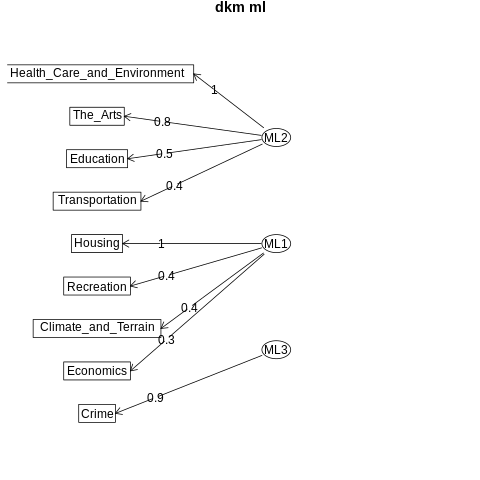

In [38]:
%%R

fa.diagram(ml,main = 'dkm ml')

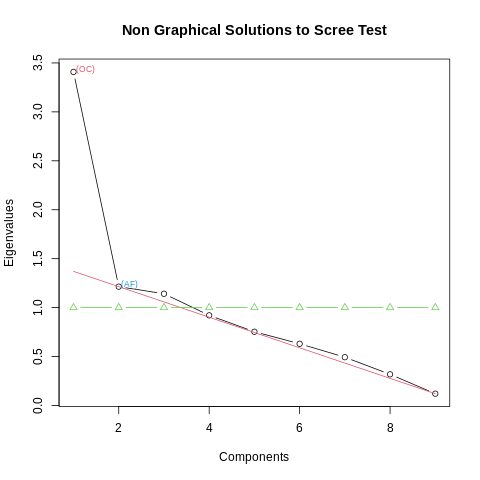

In [47]:
%%R
ev <- eigen(cor(data))
sree <-nScree(x=ev$values)
plotnScree(sree, legend = F)

In [51]:
%%R
fit <- factanal(data,3,rotation = 'varimax')
print(fit, digits = 2, cutoff=0.3, sort = T)


Call:
factanal(x = data, factors = 3, rotation = "varimax")

Uniquenesses:
        Climate_and_Terrain                     Housing 
                       0.83                        0.00 
Health_Care_and_Environment                       Crime 
                       0.02                        0.13 
             Transportation                   Education 
                       0.74                        0.75 
                   The_Arts                  Recreation 
                       0.22                        0.71 
                  Economics 
                       0.86 

Loadings:
                            Factor1 Factor2 Factor3
Health_Care_and_Environment  0.97                  
The_Arts                     0.82                  
Housing                              0.95          
Crime                                        0.90  
Climate_and_Terrain                  0.37          
Transportation               0.43                  
Education                    0.50  

In [52]:
%%R
ml <- fa(r=data,
         nfactor = 3,
         rotate = 'varimax',
         #fm = 'ml',
         #residuals = TRUE
         )

In [54]:
%%R
ml

Factor Analysis using method =  minres
Call: fa(r = data, nfactors = 3, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
                             MR1   MR2  MR3   h2       u2 com
Climate_and_Terrain         0.08  1.00 0.05 1.00 -0.00048 1.0
Housing                     0.33  0.32 0.42 0.39  0.61269 2.8
Health_Care_and_Environment 0.97  0.14 0.16 0.99  0.00535 1.1
Crime                       0.22  0.11 0.45 0.26  0.74155 1.6
Transportation              0.47  0.04 0.32 0.33  0.67465 1.8
Education                   0.49  0.00 0.06 0.24  0.75877 1.0
The_Arts                    0.80  0.17 0.30 0.76  0.23687 1.4
Recreation                  0.21  0.19 0.61 0.45  0.55130 1.5
Economics                   0.02 -0.10 0.43 0.20  0.80222 1.1

                       MR1  MR2  MR3
SS loadings           2.26 1.21 1.15
Proportion Var        0.25 0.13 0.13
Cumulative Var        0.25 0.38 0.51
Proportion Explained  0.49 0.26 0.25
Cumulative Proportion 0.49 0.75 1

In [56]:
%%capture
%%R
install.packages("paran")

In [58]:
%%R
library(paran)

R[write to console]: Loading required package: MASS

R[write to console]: 
Attaching package: ‘MASS’


R[write to console]: The following object is masked from ‘package:dplyr’:

    select





Using eigendecomposition of correlation matrix.
Computing: 10%  20%  30%  40%  50%  60%  70%  80%  90%  100%


Results of Horn's Parallel Analysis for factor retention
270 iterations, using the mean estimate

-------------------------------------------------- 
Factor      Adjusted    Unadjusted    Estimated 
            Eigenvalue  Eigenvalue    Bias 
-------------------------------------------------- 
No components passed. 
-------------------------------------------------- 
1           2.663937    2.953439      0.289502
2           0.403706    0.598013      0.194307
3           0.277172    0.404089      0.126916
4           0.200713    0.267528      0.066814
5           0.095915    0.111440      0.015524
6           0.069416    0.032174     -0.03724
-------------------------------------------------- 

Adjusted eigenvalues > 0 indicate dimensions to retain.
(6 factors    retained)



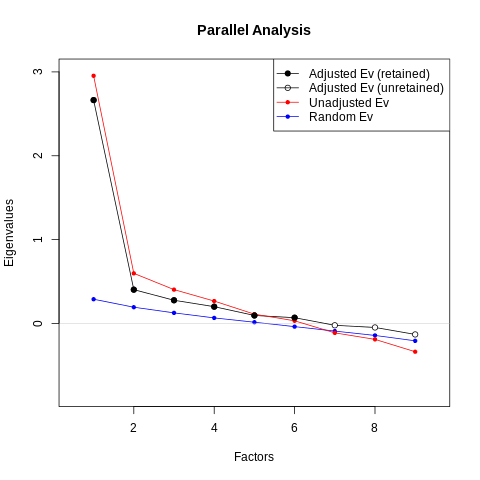

In [61]:
%%R
paran(data,cfa = TRUE, graph = TRUE,
      #colour = TRUE
      )